# Introduction

As a biodata scientist working in medical health services, especially in surgery sector,and one of my responsibilities to examine medical reports to determine whether a patient has surgery on the same area of an organ or a different part of the body. , for that i have texts  which are extracted from medical reports and , I'will process to identify their similarity .

To achieve this, I have created two texts extracted from medical reports. I will process these texts to assess their similarity.

# Import liberaries

In [ ]:
!pip install --upgrade scikit-learn
!pip install spacy
!python -m spacy download en_core_web_lg
import pandas as pd
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import re
import math
from collections import Counter
from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud



# Text extracted

In [ ]:
text_1 = '''
Introduction
Although the adverse effects of cocaine use in pregnancy are well recognised, we believe this case highlights the importance of considering the route of administration, and suggests the possibility of multifocal damage relating to intravenous use.

Case presentation
A Caucasian female baby of 29-weeks' gestation was spontaneously delivered and subsequently developed multi-organ failure considered unrelated to simple prematurity. Intensive care was re-orientated following the development of massive intraventricular haemorrhage.

Conclusion
This case illustrates the need for regular cranial ultrasound in babies of pregnancies at risk due to intravenous cocaine use and also the necessity of counselling women who misuse cocaine in the antenatal period. As such, this article will be of most interest to paediatric and obstetric staff.

'''

In [ ]:
len(text_1 )

856

In [ ]:
text_2 = '''
Background
Silent myocardial infarction relates to the absence of symptoms usually associated with myocardial ischemia. It has been estimated that silent myocardial infarction can occur in 2–4 % of young adult asymptomatic men. A majority of patients without an initially apparent cause of sudden death have been found at autopsy to have had significant coronary heart disease, including old, undetected myocardial infarction. Cases of sudden death in young men with unrecognized silent myocardial ischemia seem to be underreported, however.

Case presentation
A 35-year-old Norwegian man without a previous medical history died suddenly without preceding symptoms of coronary ischemia. Apart from elevated lactate, his laboratory test results were within normal limits. An autopsy revealed advanced coronary artery thrombosis of the left anterior descending branch with an extensive, partly organized myocardial infarction. The results of toxicological examinations of peripheral blood were negative for usual narcotics and alcohol.

Conclusions
Sudden, unexpected death due to myocardial infarction can occur even at a young age in patients without known coronary heart disease.

'''

In [ ]:
len(text_2 )

1183

# Preprocessing
using regular expression

In [ ]:
#Remove numbers

text_1 = re.sub(r'\d+', '', text_1)
text_2 = re.sub(r'\d+', '', text_2)

print(text_1)
print('******')
print(text_2)


Introduction
Although the adverse effects of cocaine use in pregnancy are well recognised, we believe this case highlights the importance of considering the route of administration, and suggests the possibility of multifocal damage relating to intravenous use.

Case presentation
A Caucasian female baby of -weeks' gestation was spontaneously delivered and subsequently developed multi-organ failure considered unrelated to simple prematurity. Intensive care was re-orientated following the development of massive intraventricular haemorrhage.

Conclusion
This case illustrates the need for regular cranial ultrasound in babies of pregnancies at risk due to intravenous cocaine use and also the necessity of counselling women who misuse cocaine in the antenatal period. As such, this article will be of most interest to paediatric and obstetric staff.


******

Background
Silent myocardial infarction relates to the absence of symptoms usually associated with myocardial ischemia. It has been estim

Here i splited  a text into individual sentences

# tokenizes sentence

In [ ]:
# Load the English language model
nlp = spacy.load('en_core_web_lg')

# Process text_1 and text_2 using the loaded language model
doc1 = nlp(text_1)
doc2 = nlp(text_2)
def token_sents(document):
    # Process the input document using the language model
    doc = nlp(document)

    # Extract sentence tokens from the processed document
    sentence_tokens = [sent.text for sent in doc.sents]

    # Return the list of sentence tokens
    return sentence_tokens

# Tokenize sentences for document 1 and document 2
sent_tokens1 = token_sents(doc1)
sent_tokens2 = token_sents(doc2)

# Print the sentence tokens  for document 1 and document 2
print("Sentence tokens for document1:")
print(sent_tokens1)
print()

print("Sentence tokens for document2:")
print(sent_tokens2)

Sentence tokens for document1:
['\nIntroduction\nAlthough the adverse effects of cocaine use in pregnancy are well recognised, we believe this case highlights the importance of considering the route of administration, and suggests the possibility of multifocal damage relating to intravenous use.\n\n', "Case presentation\nA Caucasian female baby of -weeks' gestation was spontaneously delivered and subsequently developed multi-organ failure considered unrelated to simple prematurity.", 'Intensive care was re-orientated following the development of massive intraventricular haemorrhage.\n\n', 'Conclusion\nThis case illustrates the need for regular cranial ultrasound in babies of pregnancies at risk due to intravenous cocaine use and also the necessity of counselling women who misuse cocaine in the antenatal period.', 'As such, this article will be of most interest to paediatric and obstetric staff.\n\n']

Sentence tokens for document2:
['\nBackground\nSilent myocardial infarction relates t

Extract tokens from the documents

In [ ]:
# Print the sentence tokens for document 1  and document 2
tokens1 = [token.text for token in doc1]
tokens2 = [token.text for token in doc2]
print(tokens1)
print(tokens2)

['\n', 'Introduction', '\n', 'Although', 'the', 'adverse', 'effects', 'of', 'cocaine', 'use', 'in', 'pregnancy', 'are', 'well', 'recognised', ',', 'we', 'believe', 'this', 'case', 'highlights', 'the', 'importance', 'of', 'considering', 'the', 'route', 'of', 'administration', ',', 'and', 'suggests', 'the', 'possibility', 'of', 'multifocal', 'damage', 'relating', 'to', 'intravenous', 'use', '.', '\n\n', 'Case', 'presentation', '\n', 'A', 'Caucasian', 'female', 'baby', 'of', '-weeks', "'", 'gestation', 'was', 'spontaneously', 'delivered', 'and', 'subsequently', 'developed', 'multi', '-', 'organ', 'failure', 'considered', 'unrelated', 'to', 'simple', 'prematurity', '.', 'Intensive', 'care', 'was', 're', '-', 'orientated', 'following', 'the', 'development', 'of', 'massive', 'intraventricular', 'haemorrhage', '.', '\n\n', 'Conclusion', '\n', 'This', 'case', 'illustrates', 'the', 'need', 'for', 'regular', 'cranial', 'ultrasound', 'in', 'babies', 'of', 'pregnancies', 'at', 'risk', 'due', 'to',

Here I wanted to compute the frequency of each word separately to see the words minimal apearance in those words. After deleting the stop words, punctuation and the upper character to lower.

# word frequency

In [ ]:
nlp = spacy.load('en_core_web_lg')
def word_freqt(doc1, doc2):
    # Initialize dictionaries to store word frequencies for each document
    word_frequencies_doc1 = {}
    word_frequencies_doc2 = {}

    # Iterate over each document and corresponding word frequencies dictionary
    for doc, word_frequencies in zip([doc1, doc2], [word_frequencies_doc1, word_frequencies_doc2]):
        # Iterate over each sentence in the document
        for sentence in doc.sents:
            # Iterate over each word in the sentence
            for word in sentence:
                # Check if the word is not a stop word
                if word.text not in STOP_WORDS:
                    # Check if the word is not a punctuation mark
                    if word.text.lower() not in punctuation:
                        # Update the word frequencies dictionary
                        if word.text not in word_frequencies.keys():
                            word_frequencies[word.text] = 1
                        else:
                            word_frequencies[word.text] += 1

    # Return the word frequencies dictionaries for both documents
    return [word_frequencies_doc1, word_frequencies_doc2]


# Aplication of the function of the word frequency
Here I wanted to compute the frequency of each word separately to see the words minimal apearance in those words. After deleting the stop words, punctuation and convert the upper character to lower

In [ ]:
# Call the word_freqt function and store the results
word_frequencies = word_freqt(doc1, doc2)

# Retrieve the word frequencies dictionaries for doc1 and doc2
word_frequencies_doc1 = word_frequencies[0]
word_frequencies_doc2 = word_frequencies[1]

# Print the maximum frequencies for doc1 and doc2
print("Max frequencies for doc1:")
for word, frequency in word_frequencies_doc1.items():
    print(f"Word: {word}, Frequency: {frequency}")

print()

print("Max frequencies for doc2:")
for word, frequency in word_frequencies_doc2.items():
    print(f"Word: {word}, Frequency: {frequency}")

Max frequencies for doc1:
Word: 
, Frequency: 4
Word: Introduction, Frequency: 1
Word: Although, Frequency: 1
Word: adverse, Frequency: 1
Word: effects, Frequency: 1
Word: cocaine, Frequency: 3
Word: use, Frequency: 3
Word: pregnancy, Frequency: 1
Word: recognised, Frequency: 1
Word: believe, Frequency: 1
Word: case, Frequency: 2
Word: highlights, Frequency: 1
Word: importance, Frequency: 1
Word: considering, Frequency: 1
Word: route, Frequency: 1
Word: administration, Frequency: 1
Word: suggests, Frequency: 1
Word: possibility, Frequency: 1
Word: multifocal, Frequency: 1
Word: damage, Frequency: 1
Word: relating, Frequency: 1
Word: intravenous, Frequency: 2
Word: 

, Frequency: 3
Word: Case, Frequency: 1
Word: presentation, Frequency: 1
Word: A, Frequency: 1
Word: Caucasian, Frequency: 1
Word: female, Frequency: 1
Word: baby, Frequency: 1
Word: -weeks, Frequency: 1
Word: gestation, Frequency: 1
Word: spontaneously, Frequency: 1
Word: delivered, Frequency: 1
Word: subsequently, Frequen

we conclude that we can't take the most frequent words into account because they might be stop words or some of the characters they haven't removed.so i need to go for the middle frequent words.

# Sentence frequency

In [ ]:
# Define a function to calculate sentence frequencies given a list of sentence tokens
def cal_sent_freqt(sentence_tokens):
    # Initialize an empty dictionary to store the sentence frequencies
    sentence_frequencies = {}

    # Iterate over each sentence token
    for sentence in sentence_tokens:
        # Check if the sentence is already in the sentence_frequencies dictionary
        if sentence not in sentence_frequencies:
            # If not present, add the sentence as a key with a frequency of 1
            sentence_frequencies[sentence] = 1
        else:
            # If already present, increment the frequency by 1
            sentence_frequencies[sentence] += 1

    # Return the sentence_frequencies dictionary
    return sentence_frequencies

In [ ]:
# Call the cal_sent_freqt function on sentence_tokens1 to calculate sentence frequencies for document 1 and document 2
sent_frequencies_doc1 = cal_sent_freqt(sent_tokens1)
sent_frequencies_doc2 = cal_sent_freqt(sent_tokens2)

# Print the sentence frequencies for document 1 and document 2
print("Sentence frequencies for doc1:")
for sentence, frequency in sent_frequencies_doc1.items():
    print(f"Sentence: '{sentence}', Frequency: {frequency}")

print()

print("Sentence frequencies for doc2:")
for sentence, frequency in sent_frequencies_doc2.items():
    print(f"Sentence: '{sentence}', Frequency: {frequency}")


Sentence frequencies for doc1:
Sentence: '
Introduction
Although the adverse effects of cocaine use in pregnancy are well recognised, we believe this case highlights the importance of considering the route of administration, and suggests the possibility of multifocal damage relating to intravenous use.

', Frequency: 1
Sentence: 'Case presentation
A Caucasian female baby of -weeks' gestation was spontaneously delivered and subsequently developed multi-organ failure considered unrelated to simple prematurity.', Frequency: 1
Sentence: 'Intensive care was re-orientated following the development of massive intraventricular haemorrhage.

', Frequency: 1
Sentence: 'Conclusion
This case illustrates the need for regular cranial ultrasound in babies of pregnancies at risk due to intravenous cocaine use and also the necessity of counselling women who misuse cocaine in the antenatal period.', Frequency: 1
Sentence: 'As such, this article will be of most interest to paediatric and obstetric staff.

Sentence Score
The cal_sent_score function computes sentence scores based on the frequency of each sentence and the highest frequency of all sentences in the text. A sentence's score is calculated by dividing its frequency by its maximum frequency.

In [ ]:
def cal_sent_score(sentence_tokens, sentence_frequencies):
    # Initialize an empty dictionary to store the sentence scores
    sentence_scores = {}

    # Find the maximum frequency among all the sentences
    max_frequency = max(sentence_frequencies.values())

    # Iterate over each sentence in the sentence tokens
    for sentence in sentence_tokens:
        # Calculate the score for the current sentence by dividing its frequency by the maximum frequency
        score = sentence_frequencies[sentence] / max_frequency

        # Store the score in the sentence_scores dictionary
        sentence_scores[sentence] = score

    # Return the dictionary containing the sentence scores
    return sentence_scores

# Calculate the sentence scores for document 1 and document 2 using the sentence tokens and frequencies
sent_scores_doc1 = cal_sent_score(sent_tokens1, sent_frequencies_doc1)
sent_scores_doc2 = cal_sent_score(sent_tokens2, sent_frequencies_doc2)

# Print the sentence scores for document 1 ,document 2
print("Sentence scores for doc1:")
for sentence, score in sent_scores_doc1.items():
    print(f"Sentence: '{sentence}', Score: {score}")

print()


print("Sentence scores for doc2:")
for sentence, score in sent_scores_doc2.items():
    print(f"Sentence: '{sentence}', Score: {score}")


Sentence scores for doc1:
Sentence: '
Introduction
Although the adverse effects of cocaine use in pregnancy are well recognised, we believe this case highlights the importance of considering the route of administration, and suggests the possibility of multifocal damage relating to intravenous use.

', Score: 1.0
Sentence: 'Case presentation
A Caucasian female baby of -weeks' gestation was spontaneously delivered and subsequently developed multi-organ failure considered unrelated to simple prematurity.', Score: 1.0
Sentence: 'Intensive care was re-orientated following the development of massive intraventricular haemorrhage.

', Score: 1.0
Sentence: 'Conclusion
This case illustrates the need for regular cranial ultrasound in babies of pregnancies at risk due to intravenous cocaine use and also the necessity of counselling women who misuse cocaine in the antenatal period.', Score: 1.0
Sentence: 'As such, this article will be of most interest to paediatric and obstetric staff.

', Score: 1

We may prioritize  the sentences depending on their relevance inside the document by computing sentence scores. Higher ratings correspond to more significant phrases, whereas lower scores correspond to less essential ones.Here because my dataset is too small it doesn't show the perfect result for the apearance of each phrase with its frequency. it show's all 1

# Cosine similarity

The method of Inverse Document Frequency (TF-IDF) vectors for given sentences using the TF-IDF function

The similarity is calculated by using both the frequency of a term (TF) within a document and its inverse document frequency (IDF) across the entire collection of documents. When computing the TF-IDF vectors, the ngram_range option determines the range of n-grams to take into account.


*   Initialize the TF-IDF vectorizer
*   Fit and transform the documents to obtain the TF-IDF matrices
*   Compute the cosine similarity between the TF-IDF vectors


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
doc1 = text_1
doc2 = text_2

# Initialize a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer()

# Convert the text in doc1 into a tf-idf matrix
tfidf_matrix1 = tfidf_vectorizer.fit_transform([doc1])

# Convert the text in doc2 into a tf-idf matrix using the same vectorizer
tfidf_matrix2 = tfidf_vectorizer.transform([doc2])

# Import the cosine_similarity function from sklearn.metrics.pairwise
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the cosine similarity between the two tf-idf matrices
similarity = cosine_similarity(tfidf_matrix1, tfidf_matrix2)

# Print the similarity between the documents
print("Similarity between the documents:", similarity[0][0])

Similarity between the documents: 0.7311732893678267


The result indicates that the documents are extremely similar. The similarity is an indicator of how similar two vectors are, in this instance the TF-IDF vectors that represent the documents. It computes the cosine of the angle between the vectors, which might vary between -1 and 1. A cosine similarity of 1 shows that the vectors are exactly the same.
The cosine similarity of 0.73 indicates that the document have similarities but because they are both medical reports. for example there are some common terminology and patterns in the texts, but there are also variances in their substance. The greater the cosine similarity, the greater the similarity between the papers.


The method of Inverse Document Frequency (TF-IDF) vectors for given sentences using the TF-IDF function

The similarity is calculated by using both the frequency of a term (TF) within a document and its inverse document frequency (IDF) across the entire collection of documents. When computing the TF-IDF vectors, the ngram_range option determines the range of n-grams to take into account.

# Calucalating TF-IdF with with n gram = 2

Here is a Function to generate WordCloud from TF-IDF vectors
we generata Generate WordCloud for Document 1 and  Document 2

*   Apply TF-IDF transformation
*   Conver a sparce metrix to a list of dic
*   Calculate TF-IDF vectors for document sentences




In [ ]:
def calc_tfidf_vect(sentences, ngram_range=(1, 2)):
    # Initialize a TfidfVectorizer object with the specified n-gram range
    tfidf_vectorizer = TfidfVectorizer(ngram_range=ngram_range)

    # Convert the sentences into a tf-idf matrix representation
    tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)

    # Initialize an empty list to store the tf-idf vectors for each sentence
    tfidf_vect = []

    # Get the feature names (terms) from the TfidfVectorizer
    feature_names = tfidf_vectorizer.get_feature_names_out()

    # Iterate over each row (sentence) in the tf-idf matrix
    for i, row in enumerate(tfidf_matrix):
        # Create a dictionary to store the tf-idf values for each feature
        tfidf_vector = {feature_names[col]: value for col, value in zip(row.indices, row.data)}

        # Append the tf-idf vector to the list
        tfidf_vect.append(tfidf_vector)

    # Return the list of tf-idf vectors
    return tfidf_vect

# Calculate the tf-idf vectors for document 1, document 2 using the sentence scores
tfidf_vect_doc1 = calc_tfidf_vect(sent_scores_doc1)
tfidf_vect_doc2 = calc_tfidf_vect(sent_scores_doc2)

# Print the tf-idf vectors for document 1, and  document 2
for i, tfidf_vector in enumerate(tfidf_vect_doc1):
    print(f"Document 1, Sentence {i + 1} TF-IDF Vector: {tfidf_vector}")

for i, tfidf_vector in enumerate(tfidf_vect_doc2):
    print(f"Document 2, Sentence {i + 1} TF-IDF Vector: {tfidf_vector}")


Document 1, Sentence 1 TF-IDF Vector: {'intravenous use': 0.11797398138871709, 'to intravenous': 0.09518066535982594, 'relating to': 0.11797398138871709, 'damage relating': 0.11797398138871709, 'multifocal damage': 0.11797398138871709, 'of multifocal': 0.11797398138871709, 'possibility of': 0.11797398138871709, 'the possibility': 0.11797398138871709, 'suggests the': 0.11797398138871709, 'and suggests': 0.11797398138871709, 'administration and': 0.11797398138871709, 'of administration': 0.11797398138871709, 'route of': 0.11797398138871709, 'the route': 0.11797398138871709, 'considering the': 0.11797398138871709, 'of considering': 0.11797398138871709, 'importance of': 0.11797398138871709, 'the importance': 0.11797398138871709, 'highlights the': 0.11797398138871709, 'case highlights': 0.11797398138871709, 'this case': 0.09518066535982594, 'believe this': 0.11797398138871709, 'we believe': 0.11797398138871709, 'recognised we': 0.11797398138871709, 'well recognised': 0.11797398138871709, 'a

The term frequency (TF) is a numerical representation of the relevance of a word or couple of words inside a text .
and in our results it illustrate each two words and their victor result.For example : "including old" have equal scores of 0.145,In this case, "asymptomatic men" has a higher score of 0.201. The difference in TF-IDF scores suggests that "asymptomatic men" is more important and distinct inside its sentence. while the terms "including old" may be more common or less distinct within the entire document collection.

I've written a function here.In which i implemented word cloud visualization for each vector in the list, with a width of 800 pixels and a height of 400 pixels in the for loop, which iterates through words or features in the tfidf_vector to its associated TF-IDF score.The frequency of the words in the vector is used to build the word cloud.Then, using plt.figure, a new figure with dimensions of 8 and 4 is created, and I use plt.axis to remove any axes. The plot is given a title through plt.title, which shows the number of words based on the index of the vector that provides word cloud visualization for each vector in the list with a width of 800 pixels and a height of 400 pixels.



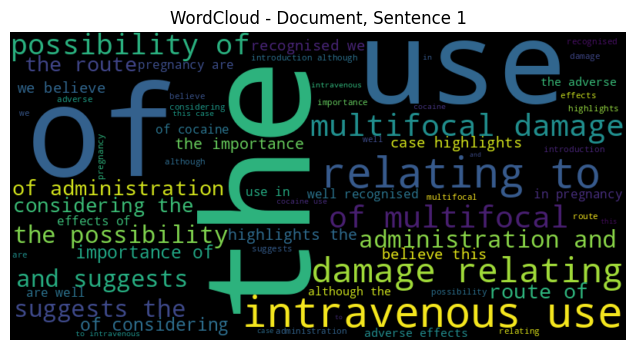

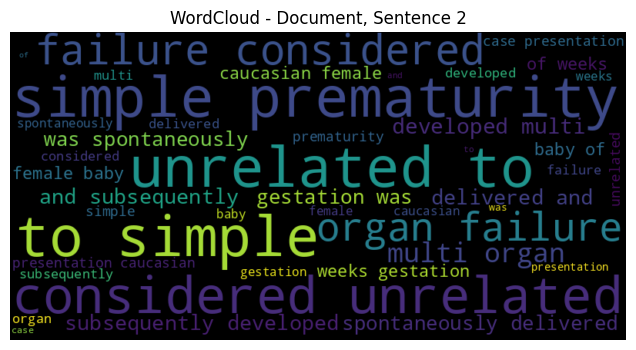

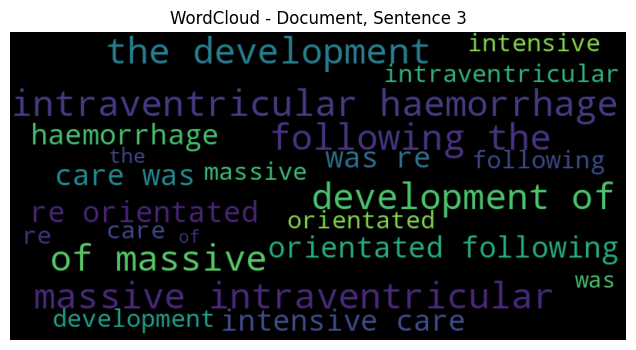

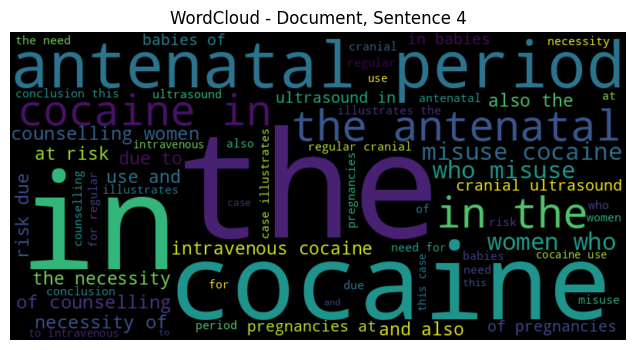

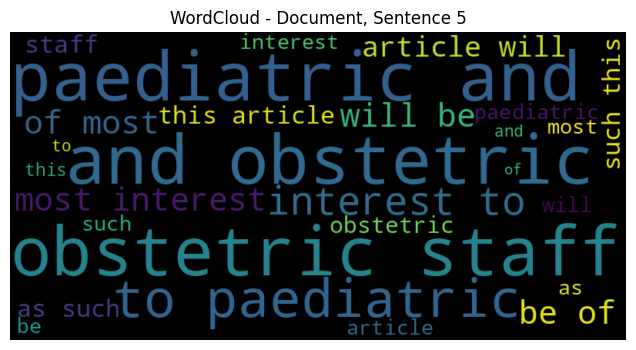

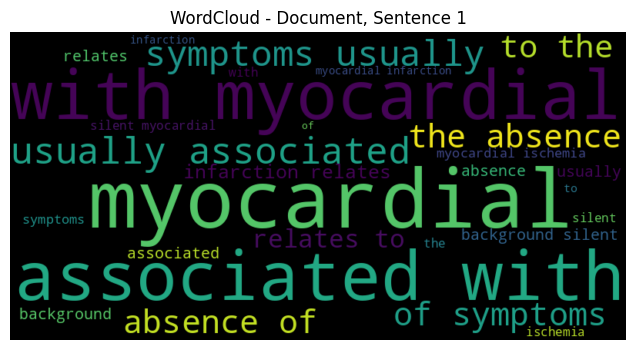

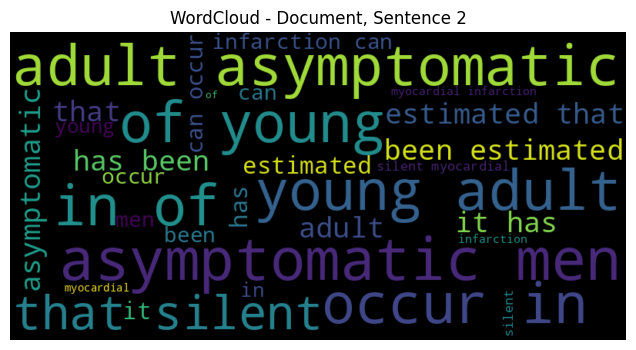

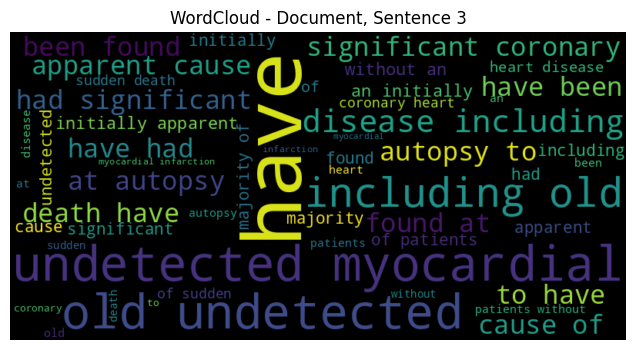

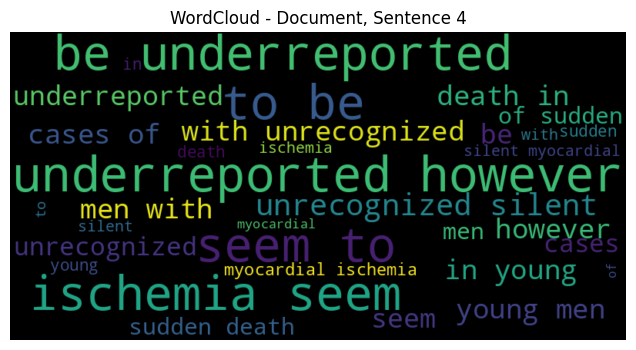

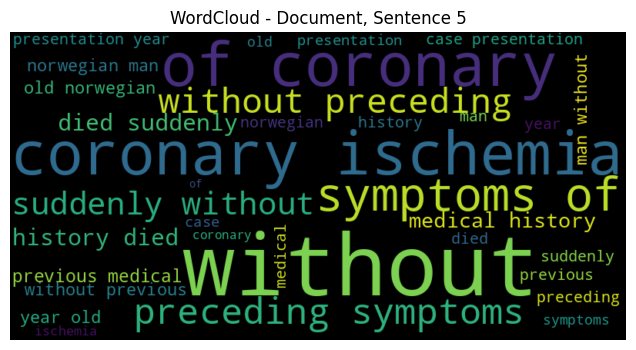

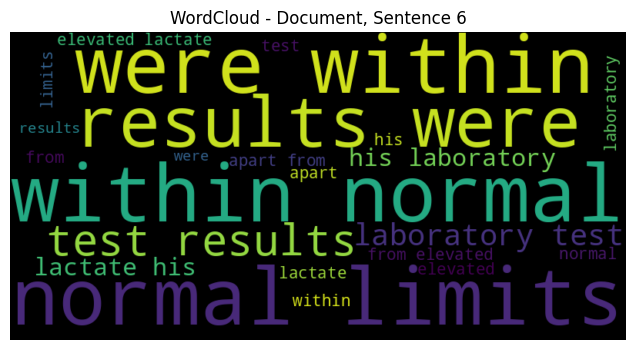

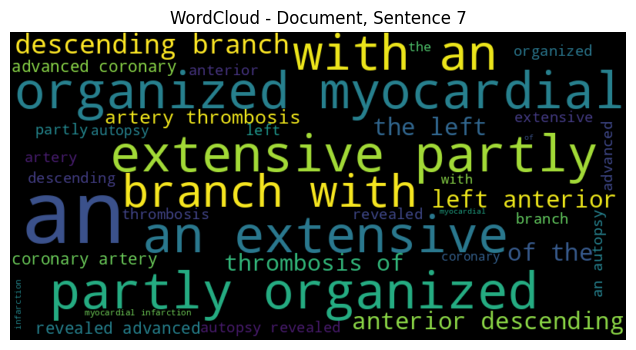

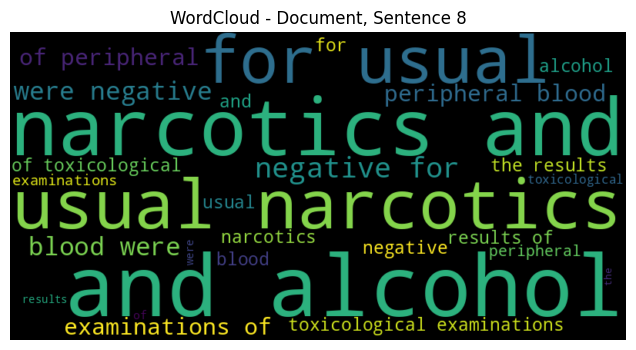

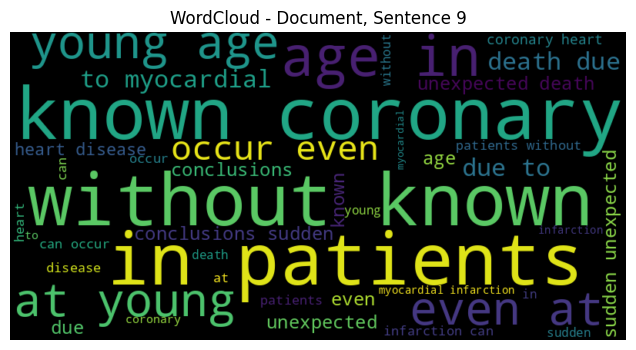

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def wordcloud(tfidf_vectors):
    # Create a WordCloud object with specified width and height
    wordcloud = WordCloud(width=800, height=400)

    # Iterate over each TF-IDF vector in the provided list
    for i, tfidf_vector in enumerate(tfidf_vectors):
        # Convert the TF-IDF vector to a dictionary of word frequencies
        word_freq = {feature: tfidf_vector.get(feature, 0) for feature in tfidf_vector}

        # Generate a WordCloud from the word frequencies
        wordcloud.generate_from_frequencies(word_freq)

        # Create a new figure with specified size
        plt.figure(figsize=(8, 4))

        # Display the WordCloud image using bilinear interpolation
        plt.imshow(wordcloud, interpolation='bilinear')

        # Set the title of the plot
        plt.title(f"WordCloud - Document, Sentence {i + 1}")

        # Turn off the axes
        plt.axis('off')

        # Show the plot
        plt.show()

# Generate and display the WordCloud for the TF-IDF vectors of document 1 ,and document 2
wordcloud(tfidf_vect_doc1)
wordcloud(tfidf_vect_doc2)

# colclusion

The TF-IDF vectors reveal that the texts are highly similar semantically. However, the specific body parts differ. The first document emphasizes "intravenous use" and "obstetric staff," while the second document highlights "myocardial ischemia" and "coronary ischemia." These differences suggest that the texts address distinct medical aspects despite their overall similarity.

In general, TF-IDF, cosin similarity scores; reveal the relative relevance of terms in a sentence or document. Ratings that are greater imply higher significance and originality, whereas scores that are lower reflect concepts that are generally accepted or less different.
Experts can work more effectively and precisely with these  technics. They may organize their analysis or information extraction by focusing on phrases with higher scores, ensuring that the most relevant and separating portions of the text are recorded. This technique enables educators or professionals to acquire significant insights from enormous quantities of text by facilitating faster understanding, extraction, and interpretation of textual data.

# References
1. Reynolds, B.C. et al. (2009) “RETRACTED ARTICLE: Multifocal multi-organ ischaemia and infarction in a preterm baby due to maternal intravenous cocaine use: a case report,” Journal of Medical Case Reports, 3(1).
Available at: https://doi.org/10.1186/1752-1947-3-9324.
Accessed 22/06/2023.
2. Aghdam, M.R.F., Vodovnik, A. and Sund, B.S. (2016) “Sudden death associated with silent myocardial infarction in a 35-year-old man: a case report,” Journal of Medical Case Reports [Preprint].
Available at: https://doi.org/10.1186/s13256-016-0823-9.
Accessed 22/06/2023.

In [ ]:
!jupyter nbconvert --to html SS0423.ipynb
